In [1]:
import os
import sys
import json
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

from vision.data.augment import zoom_in
from vision.data.results_collector import ResultsCollector
from vision.vizualization import drawer

In [2]:
def write_coco_file(coco_data, output_path):
    with open(output_path, "w") as f:
        json.dump(coco_data, f)


def load_coco_file(file_path):
    with open(file_path, "r") as f:
        coco = json.load(f)

    return coco

def plot_img(img, cmap=None):
    f, ax = plt.subplots(1, 1, figsize = (15, 10))
    if cmap is None:
        ax.imshow(img)
    else:
        ax.imshow(img, cmap)
def create_hash(coco):

    ann_mapping = {}
    ann_keys = []
    for ann in coco['annotations']:
        if ann['image_id'] in ann_keys:
            ann_mapping[ann['image_id']].append(ann)
        else:
            ann_mapping[ann['image_id']] = [ann]
            ann_keys = list(ann_mapping.keys())

    return ann_mapping

In [3]:
rc = ResultsCollector()

coco_fp = '/home/fruitspec-lab/FruitSpec/Data/JAI_FSI_V6_COCO/annotations/instances_train.json'
data_dir = '/home/fruitspec-lab/FruitSpec/Data/JAI_FSI_V6_COCO/train2017'

In [4]:
coco = load_coco_file(coco_fp)
images = coco['images']
h = create_hash(coco)

In [5]:
ann = coco['annotations']
sizes = []
widths = []
heights = []
    image_ids = []
    for a in ann:
        if a['bbox'][2] > 80:
            if a['image_id'] not in image_ids:
                image_ids.append(a['image_id'])
        widths.append(a['bbox'][2])
        heights.append(a['bbox'][3])
        sizes.append(a['bbox'][2] * a['bbox'][3])

In [6]:
desired_ann_width = np.random.randint(150, 251)
image_name = images[image_ids[0]]['file_name']
image = cv2.imread(os.path.join(data_dir, image_name))

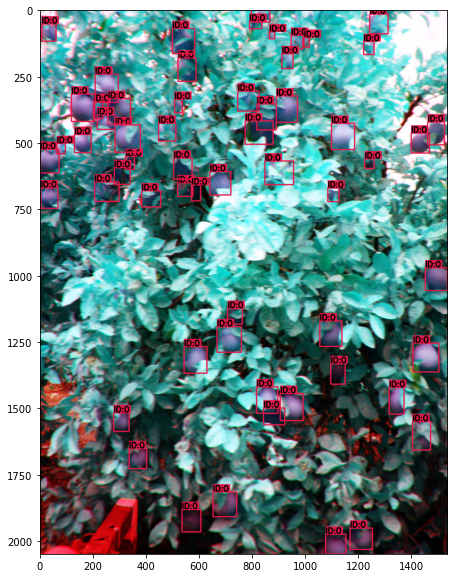

In [8]:
#for ann in ann:
    #if ann['bbox'][2] > 80:  # width
        #r = desired_ann_width / ann['bbox'][2]
        #a = ann.copy()
        #break
dets = h[image_ids[0]]
d = []
for a in dets:
    bbox = a['bbox']
    d.append([bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3], 0, 0, 0, 0])
cimg = rc.draw_dets(image,d)
plot_img(cimg)

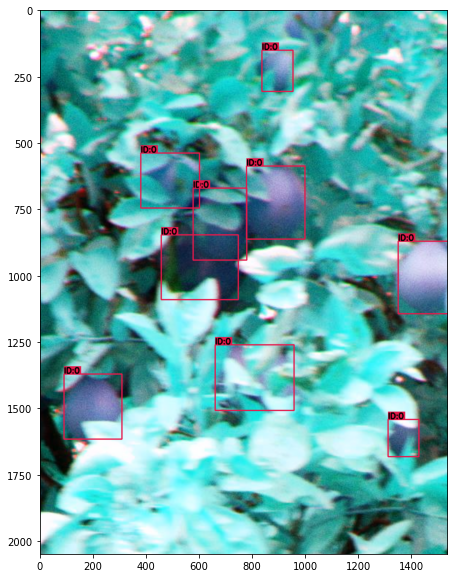

In [7]:
dets = h[image_ids[0]]
image.shape
c_img, ann = zoom_in(image, dets, 80, 220)
d = []
for a in ann:
    bbox = a['bbox']
    d.append([bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3], 0, 0, 0, 0])
dimg = rc.draw_dets(c_img,d)
plot_img(dimg)

In [13]:
dets

[{'id': 247,
  'image_id': 2,
  'category_id': 0,
  'bbox': [261, -783, 69.293, 74.65],
  'area': 5172.731,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 248,
  'image_id': 2,
  'category_id': 0,
  'bbox': [238, -680, 39.96, 49.264],
  'area': 1968.575,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 249,
  'image_id': 2,
  'category_id': 0,
  'bbox': [-35, -703, 44.534, 51.597],
  'area': 2297.819,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 250,
  'image_id': 2,
  'category_id': 0,
  'bbox': [13, -695, 20.592, 36.952],
  'area': 760.936,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 251,
  'image_id': 2,
  'category_id': 0,
  'bbox': [-70, -634, 42.786, 56.561],
  'area': 2420.033,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 252,
  'image_id': 2,
  'category_id': 0,
  'bbox': [-91, -475, 80.085, 99.924],
  'area': 8002.397,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 253,
  'image_id': 2,
  'category_id': 0,
  'bbox': [-164, -445, 73.227, 98.812],
  'area': 7235.729,
  'seg

In [11]:
image.shape

(2048, 1536, 3)